# Exercise: Amazon Fine Food reviews LSTM model.

## Step By Step Process 
- Lets start working on this assignment and as we know the main objective of this assignmenst is to Try LSTM Models on Amazon Food Reviews 
- So in this assignment we will try to implement LSTM but before that we need do some certain operations i.e First we need to convert our data set in imdb data set formant.
- Lets do that 
    1. As we know we have a data set which has reviews and class lables belongs to that review i.e positive(1) or negative(0) and then we need to make a vocab for of set of all the words in all the reviews and for each words we need to count the frequency of the each words in the reviews and then we will sort it out and set the ranking of the words beased on its occurance and after doing all that we need to set the ranking of the words in the reviews and so on 
    2. but here we are uwing keras lib which is automatically doing all these for us.
    3. and using keras.preprocessing.text lib we will first Tokenizer(num_words=5000) and set num_words =5000 i.e we only want top 5000 words in our corpus and turning texts into sequences (=list of word indexes, where the word of rank i in the dataset (starting at 1) has index i). and then using this we will convert our train and test texts/reviews to turn to sequences.
    4. After that we will truncate and/or pad input sequences to trun our each into same length so that it will be easy for us to apply model on top of it 
- After doing all above we will try RNN with various LSTM layers i.e 1 and 2 using train and test and try to meansure accuracy. 

In [1]:
# Importing libraries
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Dropout
# fix random seed for reproducibility
np.random.seed(7)

import pickle

C:\Users\nisha\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#taking cleaned data i.e in Reviews table  from final sql database
#making connection with database 
conn = sqlite3.connect('final.sqlite') 
final = pd.read_sql_query(""" SELECT * FROM Reviews ORDER BY Time""", conn)  

In [3]:
final.shape

(364171, 12)

In [4]:
final = final[:50000]
print(len(final))

50000


In [5]:
# Changing the class lables from positive negative to 0/1
def scorepol(y):
    if y == "positive":
        return 1
    else:
        return 0 
    
final['Score'] = final['Score'].map(scorepol)

In [6]:
final.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
2,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
3,346055,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...
4,417838,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,1,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...


In [7]:
x = final['CleanedText'].values
y = final['Score']

# Splitting the data into 80-20 train_data and test_data
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("No. of datapoints in X_train :",len(X_train))
print("No. of datapoints in X_test :",len(X_test))
print("Shape of Y_train :",Y_train.shape)
print("Shape of Y_test :",Y_test.shape)

No. of datapoints in X_train : 40000
No. of datapoints in X_test : 10000
Shape of Y_train : (40000,)
Shape of Y_test : (10000,)


In [8]:
# https://keras.io/preprocessing/text/
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)

In [9]:
X_test = tokenizer.texts_to_sequences(X_test)

In [10]:
print(X_train[1])
print(type(X_train[1]))
print(len(X_train[1]))

[243, 9, 19, 3411, 355, 272, 263, 162, 125, 355, 58, 2, 37, 125, 355, 636, 75, 37, 4, 33, 115, 26, 520]
<class 'list'>
23


In [11]:
# truncate and/or pad input sequences
max_review_length = 400
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print(X_train[1])
print(X_train.shape)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [12]:
# utility function
def plt_dynamic_model(x, vy, ty):
    plt.figure(figsize=(10,5))
    plt.plot(x, vy, 'b', label="Val Loss")
    plt.plot(x, ty, 'r', label="Train Loss")
    plt.xlabel('Epochs val') 
    plt.ylabel('Crossentropy Loss')
    plt.title('\nCrossentropy Loss VS Epochs')
    plt.legend()
    plt.show()

## 1. RNN with 1 LSTM layer

In [14]:
embedding_vecor_length = 32
model1 = Sequential()
model1.add(Embedding(5000, embedding_vecor_length, input_length=max_review_length))
model1.add(LSTM(100))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model
history1 = model1.fit(X_train, Y_train, nb_epoch=10, batch_size=64  ,verbose=1,validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 400, 32)           160000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\nisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 457s 11ms/step - loss: 0.2469 - acc: 0.9103 - val_loss: 0.1863 - val_acc: 0.9311
Epoch 2/10
40000/40000 [==============================] - 408s 10ms/step - loss: 0.1670 - acc: 0.9375 - val_loss: 0.1839 - val_acc: 0.9315
Epoch 3/10
40000/40000 [==============================] - 400s 10ms/step - loss: 0.1462 - acc: 0.9461 - val_loss: 0.1883 - val_acc: 0.9309
Epoch 4/10
40000/40000 [==============================] - 408s 10ms/step - loss: 0.1310 - acc: 0.9528 - val_loss: 0.1910 - val_acc: 0.9291
Epoch 5/10
40000/40000 [==============================] - 423s 11ms/step - loss: 0.1176 - acc: 0.9575 - val_loss: 0.2045 - val_acc: 0.9252
Epoch 6/10
40000/40000 [==============================] - 450s 11ms/step - loss: 0.1054 - acc: 0.9636 - val_loss: 0.2153 - val_acc: 0.9279
Epoch 7/10
40000/40000 [==============================] - 420s 11ms/step - loss: 0.0942 - acc: 0.9679 - val_loss: 0.

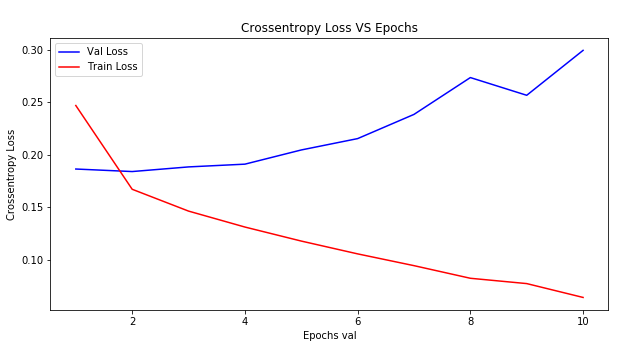

Accuracy: 91.53%


In [15]:
#-------------------------------------------------PLOT--------------------------------------------------------
x = list(range(1,11))
vy = history1.history['val_loss']
ty = history1.history['loss']

plt_dynamic_model(x, vy, ty)

model_scores = model1.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (model_scores[1]*100))

model1_test_acc = model_scores[1]
model1_train_acc = max(history1.history['acc'])

## 2. RNN with 2 LSTM layers

In [16]:
embedding_vecor_length = 32
model2 = Sequential()
model2.add(Embedding(5000, embedding_vecor_length, input_length=max_review_length))
model2.add(LSTM(100, return_sequences=True))
model2.add(LSTM(100))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

history2 = model2.fit(X_train, Y_train, nb_epoch=10, batch_size=64,verbose=1,validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 400, 32)           160000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 400, 100)          53200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 293,701
Trainable params: 293,701
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\nisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 1055s 26ms/step - loss: 0.2380 - acc: 0.9134 - val_loss: 0.1926 - val_acc: 0.9250
Epoch 2/10
40000/40000 [==============================] - 976s 24ms/step - loss: 0.1638 - acc: 0.9397 - val_loss: 0.1844 - val_acc: 0.9291
Epoch 3/10
40000/40000 [==============================] - 922s 23ms/step - loss: 0.1382 - acc: 0.9501 - val_loss: 0.1930 - val_acc: 0.9306
Epoch 4/10
40000/40000 [==============================] - 971s 24ms/step - loss: 0.1177 - acc: 0.9583 - val_loss: 0.2085 - val_acc: 0.9228
Epoch 5/10
40000/40000 [==============================] - 1058s 26ms/step - loss: 0.1018 - acc: 0.9657 - val_loss: 0.2295 - val_acc: 0.9245
Epoch 6/10
40000/40000 [==============================] - 1019s 25ms/step - loss: 0.0872 - acc: 0.9715 - val_loss: 0.2656 - val_acc: 0.9201
Epoch 7/10
40000/40000 [==============================] - 1044s 26ms/step - loss: 0.0733 - acc: 0.9766 - val_loss

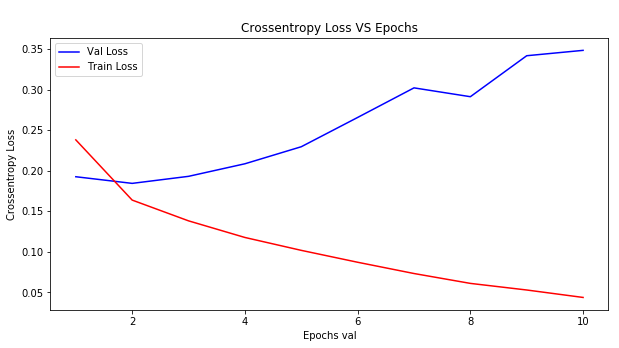

Accuracy: 91.64%


In [18]:
#-------------------------------------------------PLOT--------------------------------------------------------
x = list(range(1,11))
vy = history2.history['val_loss']
ty = history2.history['loss']

plt_dynamic_model(x, vy, ty)

model_scores = model2.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (model_scores[1]*100))

model2_test_acc = model_scores[1]
model2_train_acc = max(history2.history['acc'])

## Conclusion 

In [19]:
from prettytable import PrettyTable

print('Performance Table')
x = PrettyTable()
x.field_names =["Models","Train","Test"]

x.add_row(["RNN with 1 LSTM layers",model1_train_acc,model1_test_acc])
x.add_row(["RNN with 2 LSTM layers",model2_train_acc,model2_test_acc])

print(x)

Performance Table
+------------------------+----------+--------+
|         Models         |  Train   |  Test  |
+------------------------+----------+--------+
| RNN with 1 LSTM layers |  0.9795  | 0.9153 |
| RNN with 2 LSTM layers | 0.986575 | 0.9164 |
+------------------------+----------+--------+
